In [2]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from auxPlots import interpolateData,getContours,saveContours
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

### EWK Efficiencies

In [3]:
#Load scan data
dataDF = pd.read_pickle('./ewk_Fig11.pcl')
dataDF['AccEff'] = [row['DV selection'][1] for _,row in dataDF.iterrows()]

In [4]:
srs = {'HighPT' : dataDF[(dataDF['SR'] == 'HighPT')], 'Trackless' : dataDF[(dataDF['SR'] == 'Trackless')]}

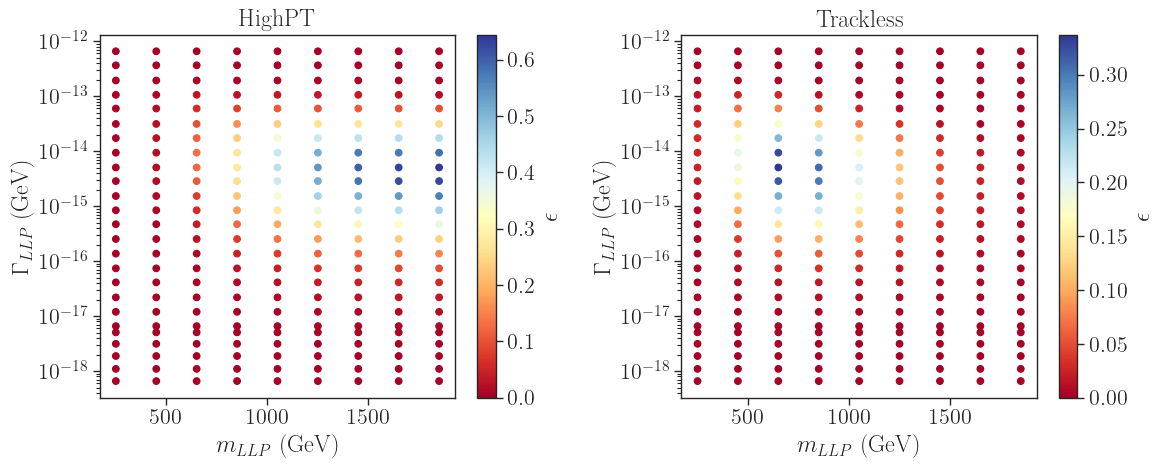

In [5]:
fig,axarray = plt.subplots(nrows=1,ncols=2,figsize=(12,5))

for isr,sr in enumerate(srs):
    ax = axarray[isr]
    data = srs[sr]
    x = data['mLLP']
    y = data['width']
    z = data['AccEff']
    ax.set_yscale('log')
    im = ax.scatter(x,y,c=z,cmap=cm)
    ax.set_title(sr)
    ax.set_xlabel(r'$m_{LLP}$ (GeV)')
    ax.set_ylabel(r'$\Gamma_{LLP}$ (GeV)')
    plt.colorbar(im, ax=ax,label=r'$\epsilon$')
plt.tight_layout()
plt.show()

In [6]:
f = 'ewk_effs.csv'
header = ['mLLP_GeV','width_GeV','eff_HighPT','eff_Trackless']
pts  = np.hstack((srs['HighPT'][['mLLP','width','AccEff']].to_numpy(),srs['Trackless'][['AccEff']].to_numpy()))
np.savetxt(f,pts,fmt='%.4e',delimiter=',',header = ",".join(header),comments='\n# Efficiencies obtained with recasting for the EWK model:\n# (pp > C1N1,C1N2,C1C1,N1N2) for a degenerate pure higgsino scenario.\n')

### Strong Efficiencies

In [7]:
dataDF = pd.read_pickle('./strong_Fig12.pcl')
dataDF['AccEff'] = [row['DV selection'][1] for _,row in dataDF.iterrows()]
srs = {'HighPT' : dataDF[(dataDF['SR'] == 'HighPT')], 'Trackless' : dataDF[(dataDF['SR'] == 'Trackless')]}

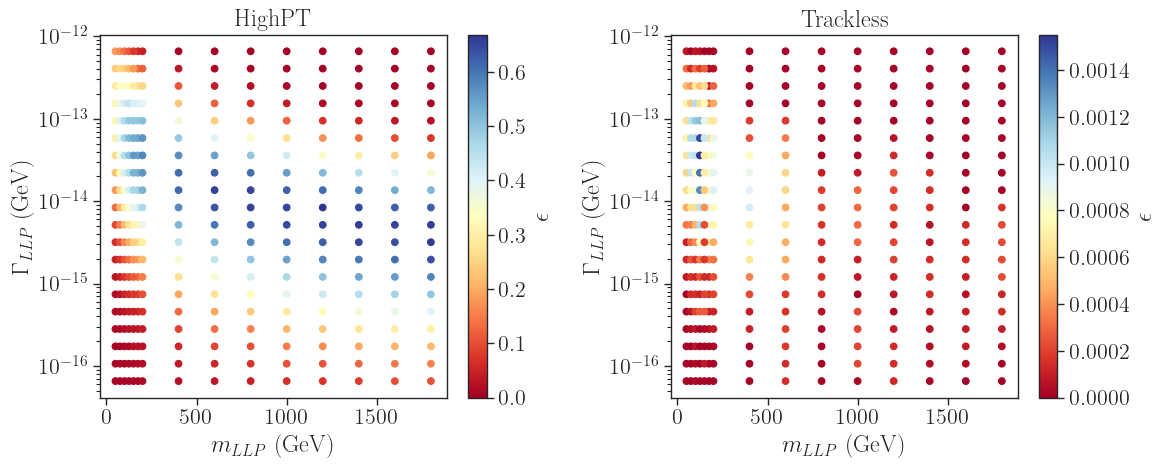

In [8]:
fig,axarray = plt.subplots(nrows=1,ncols=2,figsize=(12,5))

for isr,sr in enumerate(srs):
    ax = axarray[isr]
    data = srs[sr]
    x = data['mLLP']
    y = data['width']
    z = data['AccEff']
    ax.set_yscale('log')
    im = ax.scatter(x,y,c=z,cmap=cm)
    ax.set_title(sr)
    ax.set_xlabel(r'$m_{LLP}$ (GeV)')
    ax.set_ylabel(r'$\Gamma_{LLP}$ (GeV)')
    plt.colorbar(im, ax=ax,label=r'$\epsilon$')
plt.tight_layout()
plt.show()


In [9]:
f = 'strong_effs.csv'
header = ['mGluino_GeV','mLLP_GeV','width_GeV','eff_HighPT','eff_Trackless']
pts  = np.hstack((srs['HighPT'][['mLSP','mLLP','width','AccEff']].to_numpy(),srs['Trackless'][['AccEff']].to_numpy()))
np.savetxt(f,pts,fmt='%.4e',delimiter=',',header = ",".join(header),comments='\n# Efficiencies obtained with recasting for the Strong model:\n# (pp > gluino,gluino), gluino > q,q,N1, N1 > q,q,q.\n')

In [11]:
srs['HighPT'][['tau_ns']].min()

tau_ns    0.001
dtype: float64

In [12]:
srs['HighPT'][['width']].max()

width    6.582000e-13
dtype: float64